<a href="https://colab.research.google.com/github/sameehaafr/tsf-arima/blob/main/tsf_airpollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting in ARIMA

Building an ARIMA model that forecasts the CO metric of air pollution in the state of California.

- Loading Libraries
- Retrieving and Cleaning Data
- EDA (trend/seasonality/cylical/irregularity), choosing important variables
- Check for stationarity (hypothesis testing), ADF/KSPSS test
- Converting non-stationary to stationary, detrending/differencing
- Pre-work for ARIMA, acf/pacf plots
- Build model
- Tune parameters

## Libraries

In [ ]:
# For data
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt

# For outliers detection
from sklearn import preprocessing, svm

# For stats components
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose 

# Train, test, validation splits and other metrics
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn import metrics


# For keeping track of parameters and outcomes
from comet_ml import Experiment

# Saving our model
import pickle

In [ ]:
!pip install --upgrade statsmodels
!pip3 install comet_ml

## Retrieving and Cleaning Data

In [ ]:
# to access files/data in google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# data: https://www.epa.gov/outdoor-air-quality-data/download-daily-data (downloaded as csv)
# we're looking at the CO metric in particular
df = pd.read_csv('/content/drive/MyDrive/cali_2021.csv')

In [ ]:
# changing data col to datetime formate for ts
df['Date'] = pd.to_datetime(df['Date'])

## EDA

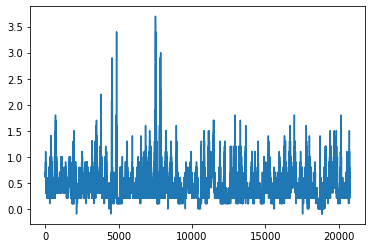

In [ ]:
#plotting CO concentration over time
cc = df['Daily Max 8-hour CO Concentration']
cc.plot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               20758 non-null  datetime64[ns]
 1   Source                             20758 non-null  object        
 2   Site ID                            20758 non-null  int64         
 3   POC                                20758 non-null  int64         
 4   Daily Max 8-hour CO Concentration  20758 non-null  float64       
 5   UNITS                              20758 non-null  object        
 6   DAILY_AQI_VALUE                    20758 non-null  int64         
 7   Site Name                          20758 non-null  object        
 8   DAILY_OBS_COUNT                    20758 non-null  int64         
 9   PERCENT_COMPLETE                   20758 non-null  float64       
 10  AQS_PARAMETER_CODE                

In [ ]:
# CO Concentration per day
ts = df.groupby(df["Date"])["Daily Max 8-hour CO Concentration"].sum()
ts

Date
2021-01-01    37.0
2021-01-02    37.1
2021-01-03    36.6
2021-01-04    36.6
2021-01-05    37.9
              ... 
2021-12-27    23.6
2021-12-28    20.2
2021-12-29    21.3
2021-12-30    24.2
2021-12-31    29.3
Name: Daily Max 8-hour CO Concentration, Length: 365, dtype: float64

In [ ]:
# drop any rows with null values
ts.dropna()

Date
2021-01-01    37.0
2021-01-02    37.1
2021-01-03    36.6
2021-01-04    36.6
2021-01-05    37.9
              ... 
2021-12-27    23.6
2021-12-28    20.2
2021-12-29    21.3
2021-12-30    24.2
2021-12-31    29.3
Name: Daily Max 8-hour CO Concentration, Length: 365, dtype: float64

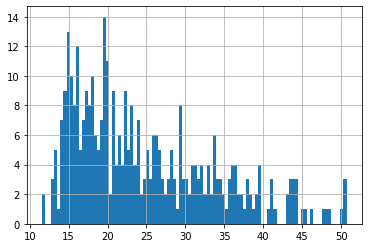

In [ ]:
# CO Concentration over time
ts.hist(bins=100)

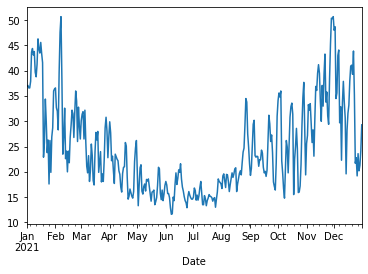

In [ ]:
ts.plot()

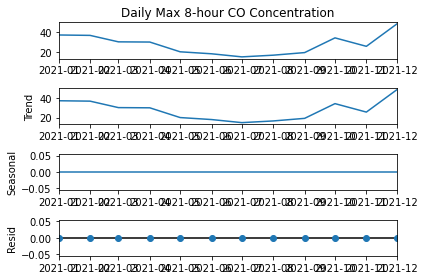

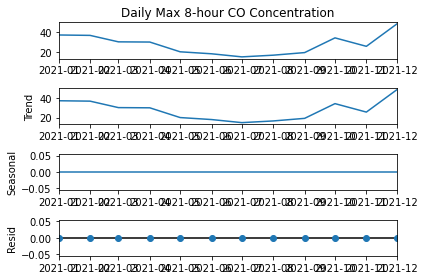

In [ ]:
a = seasonal_decompose(ts.asfreq('MS'), model = "additive", period=1)
a.plot()

In [ ]:
def plot_moving_average(ts, window, plot_intervals=False, scale=1.96):

    rm = ts.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rm, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(ts[window:], rm[window:])
        deviation = np.std(ts[window:] - rm[window:])
        lower_bound = rm - (mae + scale * deviation)
        upper_bound = rm + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(ts[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

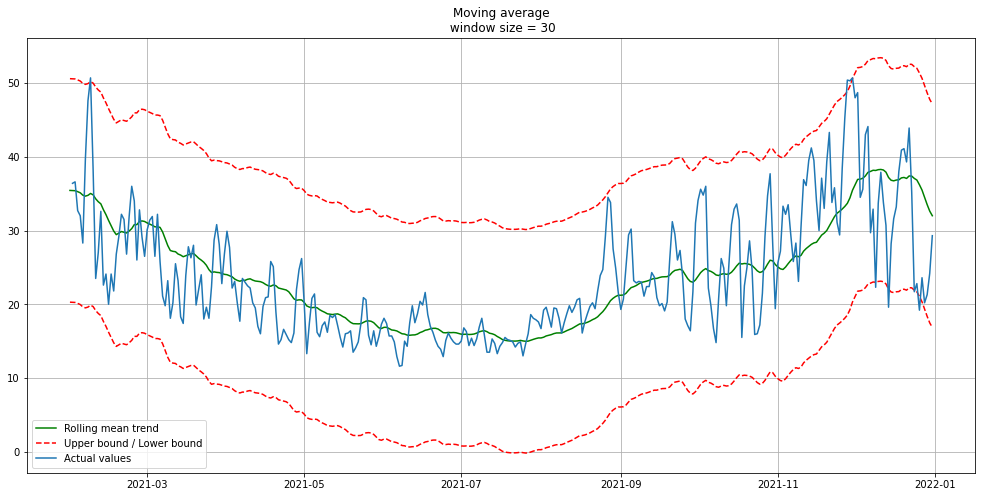

In [ ]:
plot_moving_average(ts, 30, plot_intervals=True)

## Check for stationarity

## Detrending/differencing

## Pre-work for ARIMA

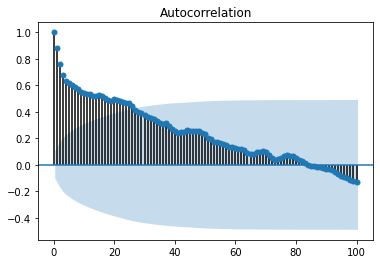

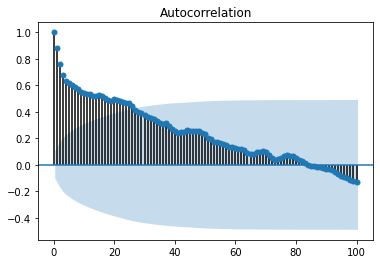

In [ ]:
# ACF plot
plot_acf(ts, lags=100)

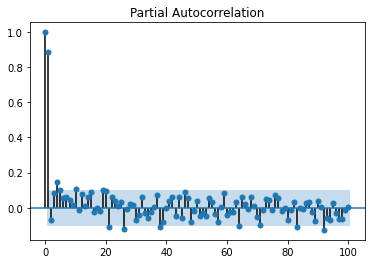

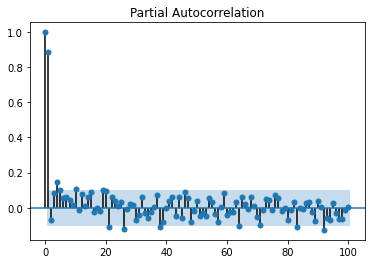

In [ ]:
# PACF plot
plot_pacf(ts, lags=100)

## Build ARIMA

In [ ]:
# splitting into train and test
train = ts[:'2021-10-01']
test = ts['2021-10-02':]

In [ ]:
# model building
# parameters: p, d, q
model = sm.tsa.arima.ARIMA(train, order=(27, 1, 3))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
fitted = model.fit()  
print(fitted.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                       SARIMAX Results                                       
Dep. Variable:     Daily Max 8-hour CO Concentration   No. Observations:                  274
Model:                               ARIMA(27, 1, 3)   Log Likelihood                -700.441
Date:                               Fri, 23 Sep 2022   AIC                           1462.882
Time:                                       20:10:44   BIC                           1574.775
Sample:                                   01-01-2021   HQIC                          1507.798
                                        - 10-01-2021                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4532      0.173      2.618      0.009       0.114       0.792
ar.L2      

In [ ]:
pickle.dump(model, open("/content/arima_model1.pkl", "wb"))

In [ ]:
# array of forecasted values
fc = fitted.forecast(len(test), alpha=0.05)
fc

2021-10-02    30.871536
2021-10-03    27.222644
2021-10-04    25.476357
2021-10-05    24.607506
2021-10-06    24.647604
                ...    
2021-12-27    30.711095
2021-12-28    30.589066
2021-12-29    30.703521
2021-12-30    30.907596
2021-12-31    30.813102
Freq: D, Name: predicted_mean, Length: 91, dtype: float64

In [ ]:
# prints the root mean square (one way to validate)
# lower RMSE's indicate the model is able to fit the dataset the best
rmse = np.sqrt(np.mean((fc.array - test.array) ** 2))
rmse

8.799096602786733

In [ ]:
# r-squared value
r2 = metrics.r2_score(fc, test)
r2

-22.2440467313722

In [ ]:
fc_series = pd.Series(fc, index=test.index)

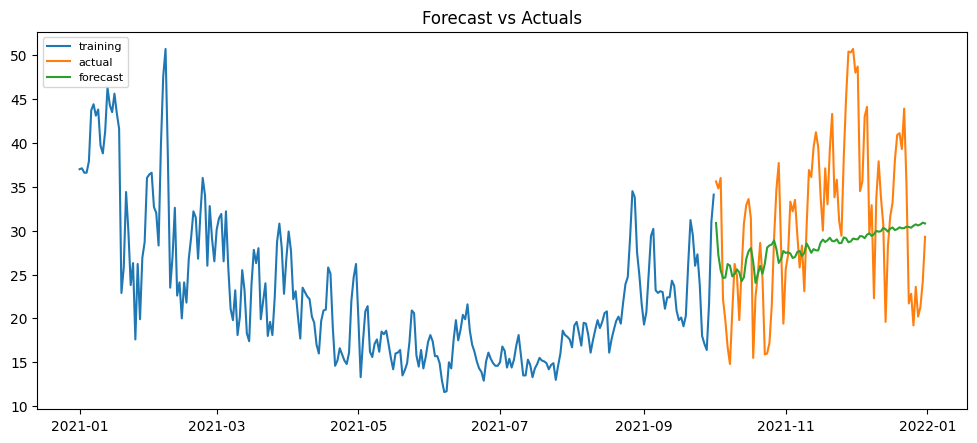

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Tune parameters

In [48]:
#model 1
  #p=27, d=1, q=3
  #aic: 1462.882
  #rmse: 8.799096602786733
  #r2: -22.2440467313722